In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Accidentalidad_en_Barranquilla.csv")
df.columns = [col.replace("\n", " ").strip() for col in df.columns]

# Graficas

In [3]:
import plotly.express as px
import plotly.graph_objects as go

## Grafica 1

Cantidad de heridos y muertos por cada tipo de accidente

In [4]:
df1 = df.copy()
df1 = df1[["GRAVEDAD_ACCIDENTE","CANT_HERIDOS_EN _SITIO_ACCIDENTE","CLASE_ACCIDENTE"]]
df1 = df1.groupby("CLASE_ACCIDENTE").sum().reset_index()
df1 = df1.sort_values(by='CANT_HERIDOS_EN _SITIO_ACCIDENTE', ascending=False)



fig = px.bar(df1,y="CANT_HERIDOS_EN _SITIO_ACCIDENTE",x="CLASE_ACCIDENTE",  labels={
                     "CANT_HERIDOS_EN _SITIO_ACCIDENTE": "Cantidad de heridos",
                     "CLASE_ACCIDENTE": "Tipo de accidente",
                 },)
fig.show()
df2 = df.copy()
df2 = df2.groupby("CLASE_ACCIDENTE").sum().reset_index()
df2 = df2.sort_values(by='CANT_MUERTOS_EN _SITIO_ACCIDENTE', ascending=False)
fig = px.bar(df2,y="CANT_MUERTOS_EN _SITIO_ACCIDENTE",x="CLASE_ACCIDENTE",labels={
                     "CANT_MUERTOS_EN _SITIO_ACCIDENTE": "Cantidad de muertos",
                     "CLASE_ACCIDENTE": "Tipo de accidente",
                 },)
fig.show()
df1

,CLASE_ACCIDENTE,GRAVEDAD_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE
2,Choque,Con heridosSolo dañosSolo dañosCon heridosSolo...,8980
0,Atropello,Con heridosCon muertosCon heridosCon heridosCo...,1677
1,Caida Ocupante,Con heridosCon heridosCon heridosCon heridosCo...,163
5,Volcamiento,Con heridosSolo dañosSolo dañosSolo dañosSolo ...,130
4,Otro,Solo dañosSolo dañosSolo dañosSolo dañosSolo d...,121
3,Incendio,Solo dañosSolo dañosSolo dañosSolo dañosSolo d...,22


## Grafica 2

In [5]:
df3 = df.copy()

df3 = df3[["AÑO_ACCIDENTE","MES_ACCIDENTE","DIA_ACCIDENTE","CANTIDAD_ACCIDENTES","CANT_HERIDOS_EN _SITIO_ACCIDENTE","CANT_MUERTOS_EN _SITIO_ACCIDENTE"]]
df4 = df3[["MES_ACCIDENTE","CANTIDAD_ACCIDENTES","CANT_HERIDOS_EN _SITIO_ACCIDENTE","CANT_MUERTOS_EN _SITIO_ACCIDENTE"]]
df3 = df3.groupby("AÑO_ACCIDENTE").sum().reset_index()
df4 = df4.groupby("MES_ACCIDENTE").sum().reset_index()



In [6]:
df4["MES_ACCIDENTE"]

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: MES_ACCIDENTE, dtype: int64

In [7]:
fig = px.bar(df3,y="CANT_HERIDOS_EN _SITIO_ACCIDENTE",x="AÑO_ACCIDENTE",labels={
                     "CANT_HERIDOS_EN _SITIO_ACCIDENTE": "Cantidad de heridos",
                     "AÑO_ACCIDENTE": "Año",
                 })
fig.show()
fig = px.bar(df4,y="CANT_HERIDOS_EN _SITIO_ACCIDENTE",x="MES_ACCIDENTE",labels={
                     "CANT_HERIDOS_EN _SITIO_ACCIDENTE": "Cantidad de heridos",
                     "MES_ACCIDENTE": "Mes",
                 })
fig.show()

## Grafica 3

In [20]:
df5 = df.copy()
df5 = df5[["HORA_ACCIDENTE","CANTIDAD_ACCIDENTES","CANT_HERIDOS_EN _SITIO_ACCIDENTE","CANT_MUERTOS_EN _SITIO_ACCIDENTE"]]
df5 = df5.groupby("HORA_ACCIDENTE").sum().reset_index()
df5["HORA_ACCIDENTE"] = pd.to_numeric(df5["HORA_ACCIDENTE"],format='%I:%M:%S:%p')
df5["HORA_ACCIDENTE_FORMATO"] =df5["HORA_ACCIDENTE"].dt.strftime("%H")
#df5 = df5.groupby(["HORA_ACCIDENTE_FORMATO"]).sum().reset_index()[["HORA_ACCIDENTE_FORMATO","CANTIDAD_ACCIDENTES"]]
#df5.columns = ["Hora","Cantidad"]
#df5 = df5.sort_values(by=['Hora'])

In [9]:
fig = px.bar(df5,x="Hora",y="Cantidad")
fig.show()

AÑO_ACCIDENTE                          Axes(0.125,0.747241;0.133621x0.132759)
MES_ACCIDENTE                       Axes(0.285345,0.747241;0.133621x0.132759)
CANT_HERIDOS_EN _SITIO_ACCIDENTE     Axes(0.44569,0.747241;0.133621x0.132759)
CANT_MUERTOS_EN _SITIO_ACCIDENTE    Axes(0.606034,0.747241;0.133621x0.132759)
CANTIDAD_ACCIDENTES                 Axes(0.766379,0.747241;0.133621x0.132759)
dtype: object

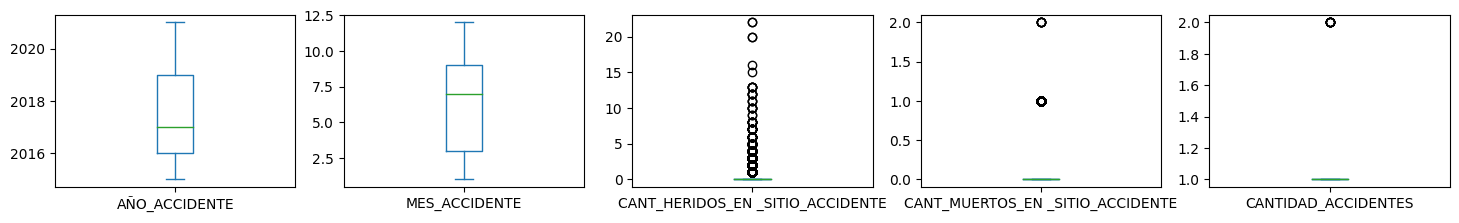

In [9]:
from matplotlib import pyplot
df.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,figsize=(18,13))


array([[<Axes: title={'center': 'AÑO_ACCIDENTE'}>,
        <Axes: title={'center': 'MES_ACCIDENTE'}>],
       [<Axes: title={'center': 'CANT_HERIDOS_EN _SITIO_ACCIDENTE'}>,
        <Axes: title={'center': 'CANT_MUERTOS_EN _SITIO_ACCIDENTE'}>],
       [<Axes: title={'center': 'CANTIDAD_ACCIDENTES'}>, <Axes: >]],
      dtype=object)

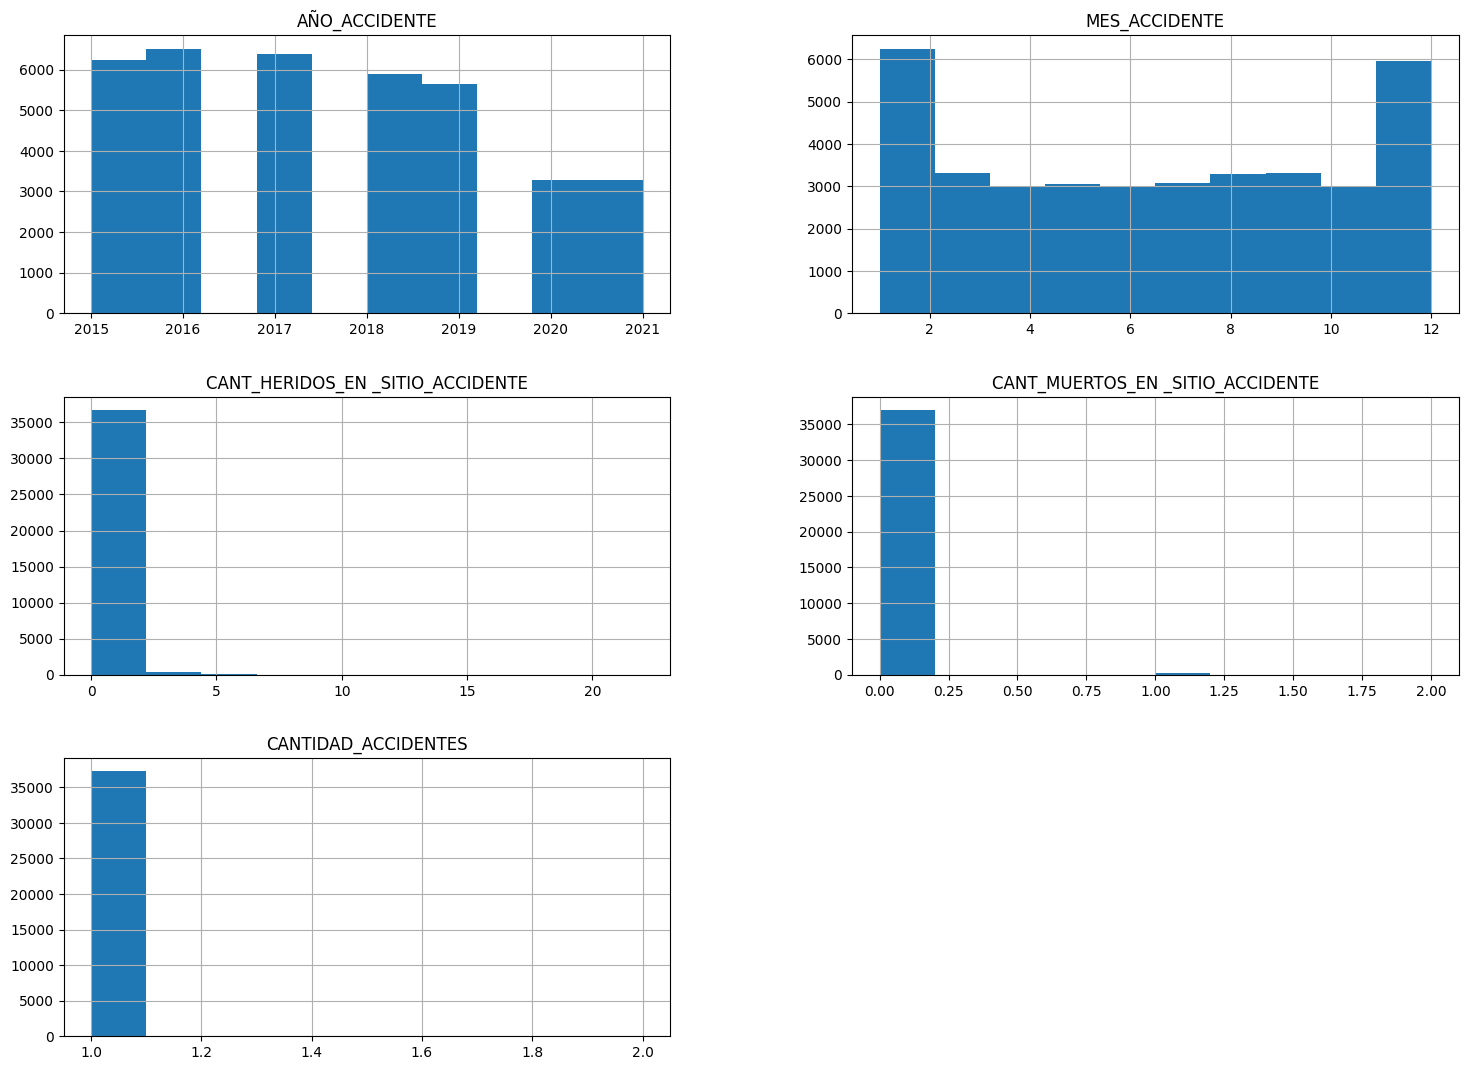

In [10]:
df.hist(figsize=(18,13))

# ML

In [11]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils.multiclass import type_of_target
from sklearn.preprocessing import LabelEncoder
import numpy as np
label_encoder = LabelEncoder()

Parametros:
- CLASE
- GRAVEDAD
- SITIO

Resultado:
- Cantidad de Heridos
- Cantidad de Muertos

In [12]:
df_muertos = df[["GRAVEDAD_ACCIDENTE","CLASE_ACCIDENTE","SITIO_EXACTO_ACCIDENTE","CANT_HERIDOS_EN _SITIO_ACCIDENTE"]]
df_muertos.columns = ["Gravedad","Clase","Lugar","Heridos"]
df_muertos = df_muertos.apply(lambda x: label_encoder.fit_transform(x))

array = df_muertos.values
parametros = array[:,0:3]
resultados = array[:,3]

In [13]:
X_train, X_validation, Y_train, Y_validation = train_test_split(parametros, resultados, test_size=0.20, random_state=1)

In [14]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.938782 (0.000680)
LDA: 0.930290 (0.001557)
KNN: 0.820406 (0.002424)
CART: 0.915758 (0.004631)
NB: 0.932438 (0.001512)


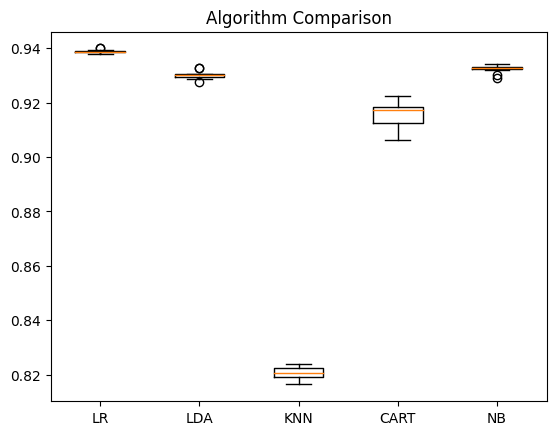

In [15]:

pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()


In [16]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [17]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9375755134917438
[[5912    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [  18 1072    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   2  337    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0   59    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0   21    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0   16    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    2    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    2    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    1    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    1    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    1    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    1    0    0    0    0    0    0    0